In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Autoregressive Model Correlation (AR(1) Process)

In an AR(1) process, each value in the time series depends on the previous value, scaled by an autoregressive parameter. The AR(1) model is represented as:

$$
y_t = c + \phi y_{t-1} + \epsilon_t
$$

Where:
- **$y_t$**: Current value of the time series at time **$t$**.
- **$c$**: Constant (intercept).
- **$\phi$**: Autoregressive coefficient (parameter).
- **$y_{t-1}$**: Previous value in the series.
- **$\epsilon_t$**: White noise error term at time **$t$**.


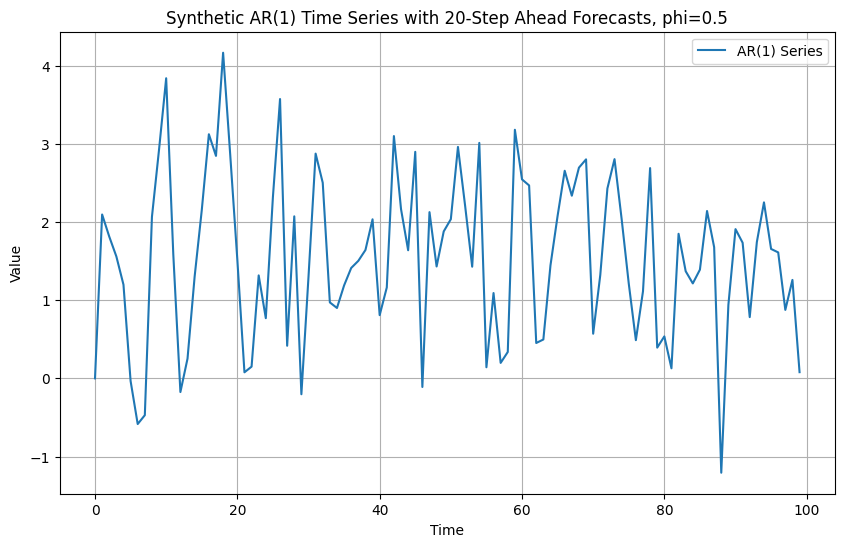

In [13]:
# Parameters for the AR(1) model
phi = 0.5  # Coefficient for the AR(1) term
c = 1  # Constant term
sigma = 1  # Standard deviation of the noise term

# Number of observations
n = 100

# Generate the synthetic AR(1) series
y = np.zeros(n)
epsilon = np.random.normal(0, sigma, n)  # Noise term

for t in range(1, n):
    y[t] = c + phi * y[t-1] + epsilon[t]

# Forecast horizon
h = 20

current_value = y[-1]  # Last observed value from the synthetic AR(1) series
# Calculate the correct forecasts for h=10 steps ahead

# Plot the original AR(1) series and the corrected forecasts
plt.figure(figsize=(10, 6))
plt.plot(y, label='AR(1) Series')
plt.title(f'Synthetic AR(1) Time Series with {h}-Step Ahead Forecasts, phi={phi}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

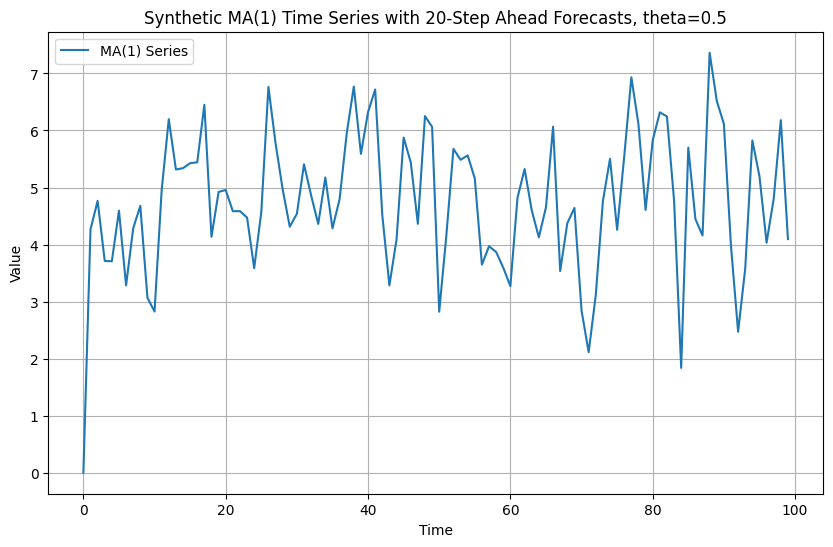

In [14]:
# Parameters for the MA(1) model
theta = 0.5 # Coefficient for the MA(1) term
mu = 5  # Mean of the series
sigma = 1  # Standard deviation of the noise term

# Generate the synthetic MA(1) series
epsilon_ma = np.random.normal(0, sigma, n + 1)  # +1 to include epsilon[-1] in the loop
y_ma = np.zeros(n)

for t in range(1, n):
    y_ma[t] = mu + theta * epsilon_ma[t-1] + epsilon_ma[t]


# Plot the MA(1) series and forecasts
plt.figure(figsize=(10, 6))
plt.plot(y_ma, label='MA(1) Series')
plt.title(f'Synthetic MA(1) Time Series with {h}-Step Ahead Forecasts, theta={theta}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Sample time series data
np.random.seed(0)
n = 100
data = pd.Series(np.random.normal(size=n).cumsum())

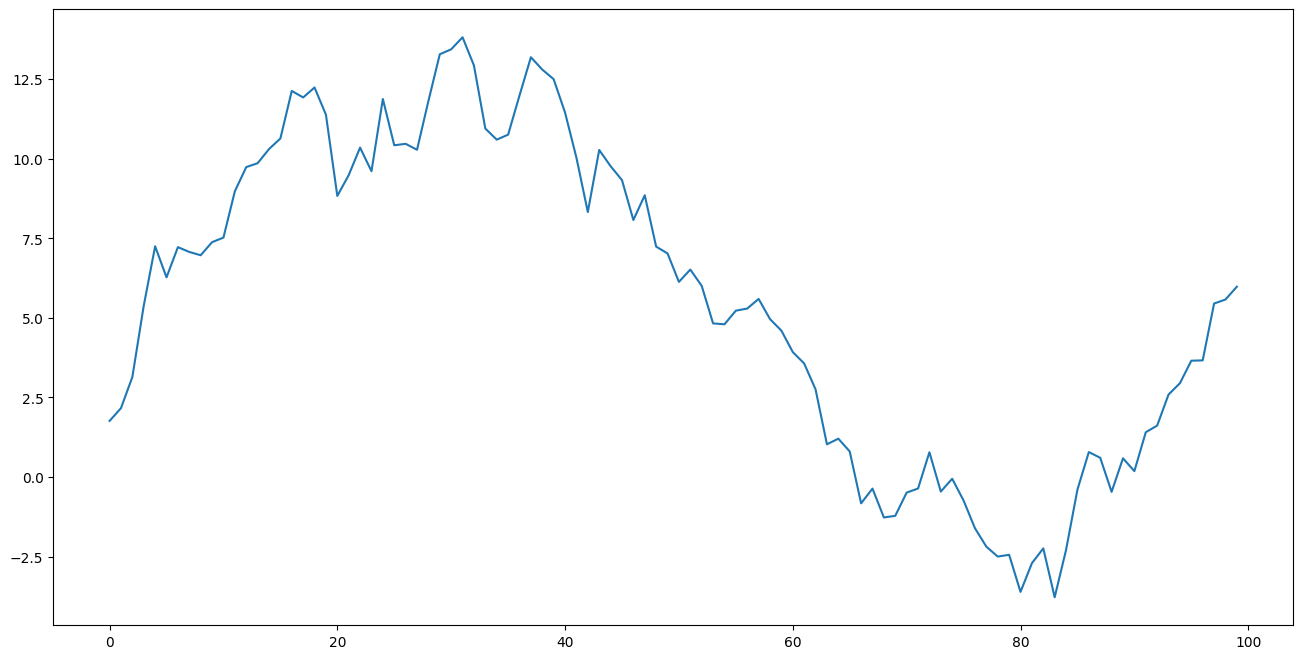

In [5]:
plt.figure(figsize=(16, 8))
plt.plot(data)

### What the Autocorrelation Computes

The **autocorrelation function (ACF)** for an AR(1) process shows the correlation between the current value **$y_t$** and its previous values **$y_{t-k}$** at lag **$k$**.

1. **Lag 1 Correlation**: The correlation at lag 1 (k=1) is equal to the autoregressive coefficient **$\phi$**.
   
2. **Decay of Correlations**: The autocorrelation at higher lags (k > 1) decays exponentially. For example:
   - Lag 2 correlation: **$\phi^2$**
   - Lag 3 correlation: **$\phi^3$**, and so forth.

This decay reflects how strongly each observation in the time series influences future values as the lag increases.

### ACF vs. PACF

While the **Autocorrelation Function (ACF)** measures the correlation between a time series and its lagged values without accounting for the relationships among intermediate lags, the **Partial Autocorrelation Function (PACF)** controls for these intermediate relationships. 

- **ACF**: It computes the total correlation between **$y_t$** and **$y_{t-k}$**, considering all lags in between. This means that if there is an indirect relationship through **$y_{t-1}$**, it will influence the correlation calculated at lag **$k$**.

- **PACF**: On the other hand, PACF quantifies the correlation between **$y_t$** and **$y_{t-k}$** while controlling for the effects of all intermediate lags (**$y_{t-1}, y_{t-2}, \ldots, y_{t-(k-1)}$**). In essence, PACF provides a clearer view of the direct relationship at each lag.

- **ACF**: provides information about the overall correlation structure of the time series, including both direct and indirect effects of lagged values.
- **PACF** In contrast, the PACF is more directly related to identifying the order of AR models because it shows the direct influence of past values.

### Correlation and Control of Variables

The correlation described in this context captures the linear relationship between the current value and its past values, but it also implicitly considers any confounding variables that may influence this relationship. To better understand this correlation, we can look at the simple correlation between two variables, **$X$** and **$Y$**, defined as:

$$
\rho_{XY} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$

Where:
- **$\rho_{XY}$**: Correlation coefficient between **$X$** and **$Y$**.
- **$\text{Cov}(X, Y)$**: Covariance between **$X$** and **$Y$**.
- **$\sigma_X$**: Standard deviation of **$X$**.
- **$\sigma_Y$**: Standard deviation of **$Y$**.

In the context of the AR(1) process, controlling for other variables is crucial to ensure that the observed correlation reflects the true relationship between the time series values. This can be achieved through techniques such as multiple regression or by including additional lags in the AR model.

#### Formula for Correlation at Lag $k$:

For an AR(1) process with |$\phi$| < 1, the correlation **$\rho_k$** at lag **$k$** is given by:

$$
\rho_k = \phi^k
$$

The exponential decay in correlations implies that an AR(1) process has a **short memory** — values only significantly correlate within a limited number of prior observations, depending on the value of **$\phi$**.


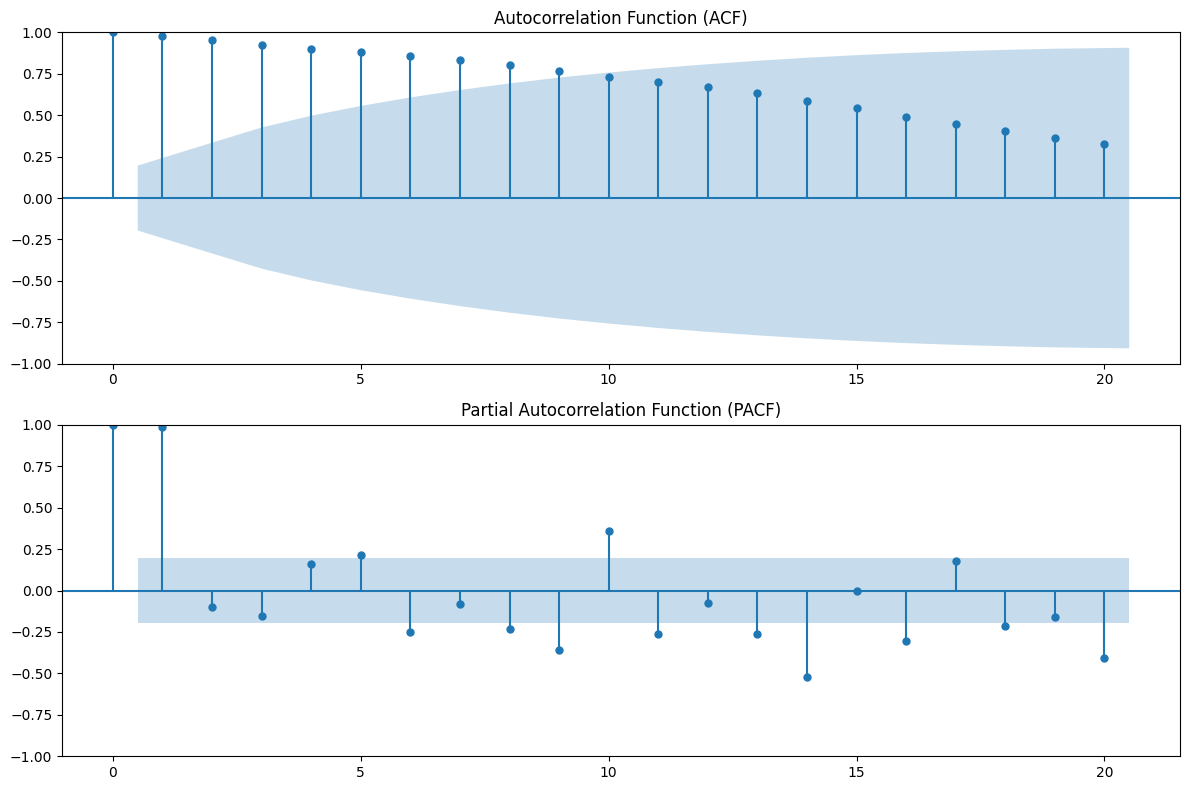

In [6]:
# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(data, ax=ax[0], lags=20)
ax[0].set_title('Autocorrelation Function (ACF)')

# PACF plot - changing method to 'yw' for compatibility if issues arise
plot_pacf(data, ax=ax[1], lags=20, method='yw')
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Understanding Stationarity in Time Series Analysis

## What is Stationarity?

**Stationarity** is a fundamental property of time series data that indicates the statistical properties of the series remain constant over time. A stationary time series has the following characteristics:

1. **Constant Mean**: The average value of the series does not change over time.
2. **Constant Variance**: The variability (spread) of the series remains constant over time.
3. **Constant Autocorrelation**: The relationship between observations at different time lags remains the same.

In practical terms, this means that if you take any segment of a stationary time series, it will have similar statistical properties as any other segment of the same length.

### Types of Stationarity

There are two main types of stationarity:

1. **Strict Stationarity**: A time series is strictly stationary if its joint distribution does not change over time. This means that the entire distribution (including all moments) of the series remains unchanged.

2. **Weak Stationarity**: A time series is weakly stationary if its mean, variance, and autocovariance are constant over time. Most time series analysis focuses on weak stationarity since it is sufficient for many statistical methods.

## Why Do We Need Stationarity?

### 1. **Model Validity**

Many statistical models for time series analysis, such as ARIMA (AutoRegressive Integrated Moving Average), require the data to be stationary. Non-stationary data can lead to misleading results, including spurious correlations and incorrect predictions.

### 2. **Predictability**

Stationary time series are more predictable because their statistical properties are stable over time. This stability allows us to apply models that rely on these properties, making forecasting more reliable.

### 3. **Simplified Analysis**

When a time series is stationary, it simplifies the analysis process. You can apply a variety of techniques, such as:

- **Autocorrelation Analysis**: Understanding how observations are related over time.
- **Statistical Testing**: Conducting hypothesis tests and making inferences based on stable properties.

### 4. **Error Reduction**

Using stationary data helps in reducing errors in model fitting. Non-stationarity can lead to larger residuals, making the model less effective.

## How to Achieve Stationarity?

If a time series is non-stationary, you can often achieve stationarity through several techniques:

1. **Differencing**: Subtracting the previous observation from the current observation helps remove trends and seasonality.
2. **Transformation**: Applying mathematical transformations (e.g., logarithm, square root) can stabilize the variance.
3. **Seasonal Decomposition**: Removing seasonal components from the data to analyze the underlying trend.

## Conclusion

Understanding and achieving stationarity is crucial in time series analysis. It ensures that the models we apply are valid and that the predictions we make are reliable. By ensuring our time series data is stationary, we set the foundation for effective analysis and forecasting.


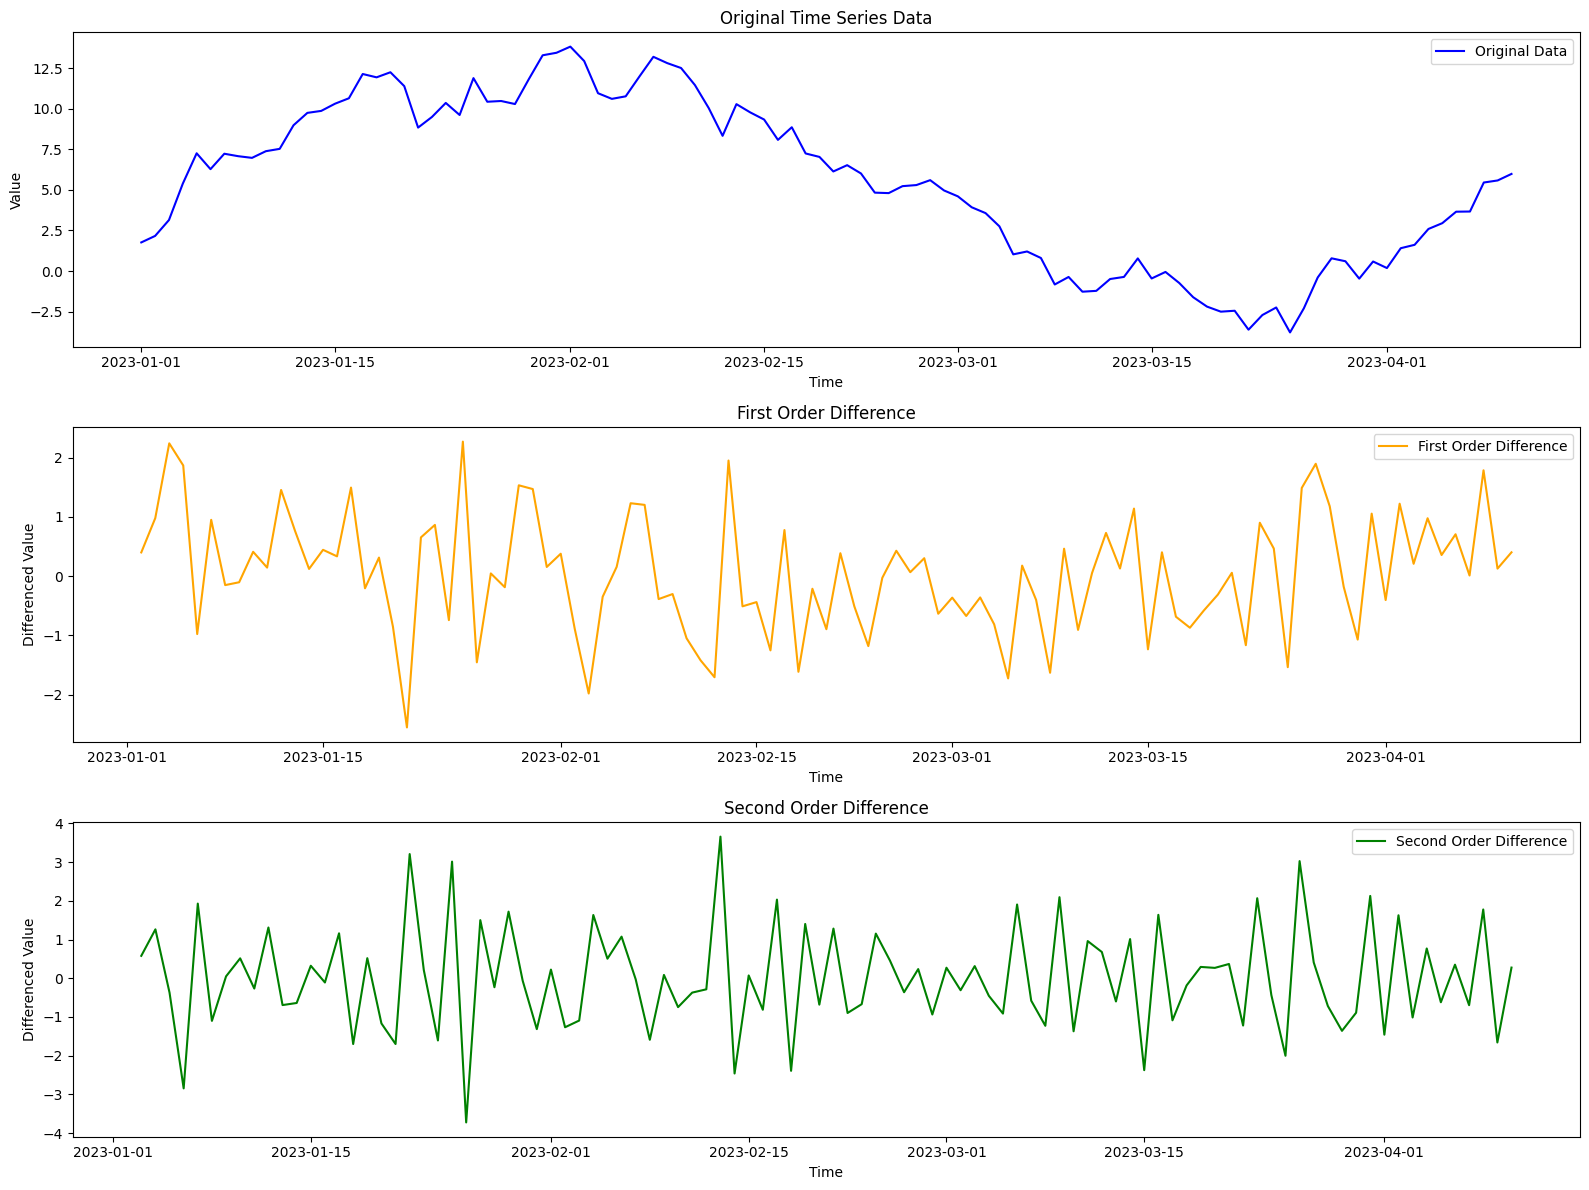

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample time series data
np.random.seed(0)
n = 100
data = pd.Series(np.random.normal(size=n).cumsum())
data.index = pd.date_range(start='2023-01-01', periods=n)

# Calculate the first order difference
first_difference = data.diff().dropna()

# Calculate the second order difference
second_difference = first_difference.diff().dropna()

# Plotting the original data, first difference, and second difference
plt.figure(figsize=(16, 12))

# Original Data Plot
plt.subplot(3, 1, 1)
plt.plot(data, label='Original Data', color='blue')
plt.title('Original Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# First Difference Plot
plt.subplot(3, 1, 2)
plt.plot(first_difference, label='First Order Difference', color='orange')
plt.title('First Order Difference')
plt.xlabel('Time')
plt.ylabel('Differenced Value')
plt.legend()

# Second Difference Plot
plt.subplot(3, 1, 3)
plt.plot(second_difference, label='Second Order Difference', color='green')
plt.title('Second Order Difference')
plt.xlabel('Time')
plt.ylabel('Differenced Value')
plt.legend()

plt.tight_layout()
plt.show()


# Cross-Validation Performance Metrics

In time series analysis and predictive modeling, it is crucial to evaluate the performance of your model accurately. Here, we will discuss three common performance metrics used in cross-validation: **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, and **Mean Absolute Percentage Error (MAPE)**.

## 1. Mean Squared Error (MSE)

**Mean Squared Error (MSE)** measures the average of the squares of the errors—meaning the average squared difference between the estimated values (predictions) and the actual value.

### Formula
The formula for MSE is:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- \( y_i \) is the actual value
- \( \hat{y}_i \) is the predicted value
- \( n \) is the number of observations


### Interpretation
A lower MSE value indicates a better fit of the model to the data. However, MSE is sensitive to outliers because it squares the errors.

## 2. Root Mean Squared Error (RMSE)

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors. It provides a measure of how well the model predicts the actual values.

### Formula
The formula for RMSE is:

$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

### Interpretation
RMSE is in the same units as the target variable, making it easier to interpret compared to MSE. Like MSE, lower values are better, indicating a more accurate model.

## 3. Mean Absolute Percentage Error (MAPE)

**Mean Absolute Percentage Error (MAPE)** measures the accuracy of a forecasting method as a percentage. It calculates the average absolute percent error for each time period.

### Formula
The formula for MAPE is:

$$
\text{MAPE} = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$

### Interpretation
MAPE expresses the error as a percentage, making it easy to understand in the context of the data. A lower MAPE value indicates a better-performing model.

## Python Code to Calculate MSE, RMSE, and MAPE

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Sample data
np.random.seed(0)
n = 100
y_true = np.random.normal(loc=100, scale=10, size=n)  # Actual values
y_pred = y_true + np.random.normal(loc=0, scale=5, size=n)  # Predicted values with some noise

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Calculate MAPE
mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # Multiply by 100 to express as percentage
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Squared Error (MSE): 26.93
Root Mean Squared Error (RMSE): 5.19
Mean Absolute Percentage Error (MAPE): 4.39%


# Information Criteria

The Akaike Information Criterion (AIC) is given by:


$${AIC} = 2k - 2 \ln(L)$$


where:
- \( k \) = number of estimated parameters in the model
- \( L \) = maximum likelihood of the model

The AIC provides a means for model selection by balancing the goodness of fit of the model against its complexity. Lower values of AIC indicate a better model.

---

The Bayesian Information Criterion (BIC) is given by:


$${BIC} = \ln(n)k - 2 \ln(L)$$


where:
- \( n \) = number of observations
- \( k \) = number of estimated parameters in the model
- \( L \) = maximum likelihood of the model

BIC also serves as a criterion for model selection but imposes a larger penalty for models with more parameters compared to AIC. Like AIC, lower values of BIC suggest a better model.


In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Sample data
np.random.seed(0)
n = 100
X = np.random.normal(size=n)
y = 2 * X + np.random.normal(size=n)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get the number of parameters
k = model.params.shape[0]

# Calculate AIC and BIC
aic = model.aic
bic = model.bic

# Display results
print(f"AIC: {aic:.2f}")
print(f"BIC: {bic:.2f}")


AIC: 293.35
BIC: 298.56
